In [1]:
import sys
sys.path.insert(1, 'C:/Users/misae/OneDrive/Documents/Studies/Uni/Física/3r any/1r semestre/P3-Metodes-numerics-II/Pràctiques/4. Pràctica lliure/Schrodinger/2D-TDSE-CN')

import Animations_preamble as ap
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [2]:
a0_conversion = 5.2917721093E-11
Na = 6.023E23

### Distance vs Z

In [4]:
atoms = {'H':(0.0, 1.008), 
         'He':(4.0, 4.003), 
         'Li':(5.5, 6.94), 
         'Be':(6.5, 9.012), 
         'B':(7.0, 10.81), 
         'C':(7.5, 12.011), 
         'N':(8.0, 14.007), 
         'O':(8.0, 15.999), 
         'F':(8.0, 19.00), 
         'Ne':(8.5, 20.18), 
         'Na':(8.5, 22.99), 
         'Mg':(8.5, 24.31), 
         'Al':(8.5, 24.31), 
         'Si':(8.0, 28.085), 
         'P':(8.0, 30.97), 
         'S':(8.5, 32.06), 
         'Cl':(8.5, 35.45), 
         'Ar':(8.5, 39.95), 
         'K':(9.0, 39.10), 
         'Ca':(8.5, 40.08), 
         'Sc':(9.0, 44.96), 
         'Ti':(8.0, 47.87), 
         'V':(8.5, 50.94), 
         'Cr':(8.0, 52.00), 
         'Mn':(8.0, 54.94), 
         'Fe':(8.0, 55.85), 
         'Co':(8.5, 58.93), 
         'Ni':(8.5, 58.69), 
         'Cu':(8.5, 63.55), 
         'Zn':(8.5, 65.38)}
ds = [atoms[i][0] for i in atoms]
Ms = [atoms[i][1] for i in atoms]
Zs = range(1, 31)

In [3]:
plt.figure(figsize=(4*1.618, 4), dpi=100)
plt.plot(Zs, ds, 'o-', markersize=3)

plt.xlabel(r'$Z$')
plt.ylabel(r'$d_c$')
plt.savefig('Imatges/distances.pdf', bbox_inches='tight')
plt.close()

### Density vs Z

In [5]:
densities = [6*Ms[i]/(Na*np.pi*ds[i]**3*a0_conversion**3)/1000 for i in range(1, len(ds))]

plt.figure(figsize=(4*1.618, 4), dpi=100)
plt.xlim((0, 32))
plt.plot(Zs[1:], densities, 'o-', markersize=3)

plt.xlabel(r'$Z$')
plt.ylabel(r'$\rho_c \ (\si{\kilo\gram\per\meter\cubed})$')
plt.savefig('Imatges/densities.pdf', bbox_inches='tight')
plt.close()

### Electron with no potential - RBC - norm vs time

In [6]:
xxs1, yys1, xxs2, yys2 = ap.get_positions('moving-no-potential/positions.txt')
Vs = ap.get_V('moving-no-potential/potential.txt')
psi_re0, psi_im0, psi_norm0 = ap.get_psi('moving-no-potential/initial-state.txt')
psi_re, psi_im, psi_norm, psi_deg, M = ap.get_results('moving-no-potential/results-RBC.txt')
zzs1 = np.zeros((ap.Ny, ap.Nx))
psi_prob = [norm**2 for norm in psi_norm]

Nombre d'iteracions: 125


In [7]:
dx = ap.Lx/(ap.Nx - 1.0)
dy = ap.Ly/(ap.Ny - 1.0)
prob0 = 0.0
total_norms = []
for k in range(M):
    prob0 = 0.0
    for j in range(ap.Ny):
        for i in range(ap.Nx):
            prob0 = prob0 + psi_prob[k][j][i]*dx*dy
    total_norms.append(prob0)
#total_norms = [np.sqrt(x) for x in total_norms]
#relative_norms = [x/total_norms[0] for x in total_norms]
errors = [abs(x - total_norms[0]) for x in total_norms]

In [25]:
plt.figure(figsize=(4*1.618, 4), dpi=100)
plt.plot(relative_norms)

plt.xlabel(r'$\mathrm{iteraci\acute{o}}$')
plt.ylabel(r'$\|\psi (t) \| / \| \psi (0) \|$')


plt.savefig('Imatges/RBC-norm-vs-time.pdf', bbox_inches='tight')
plt.close()

In [8]:
plt.figure(figsize=(4*1.618, 4), dpi=100)
xs = range(0, 4*M, 4)
plt.plot(xs, errors)

plt.xlabel(r'$\mathrm{iteraci\acute{o}}$')
plt.ylabel(r'$\mathrm{error}$')


plt.savefig('Imatges/RBC-error-vs-time.pdf', bbox_inches='tight')
plt.close()

### Electron with no potential - ABC - norm vs time

In [2]:
xxs1, yys1, xxs2, yys2 = ap.get_positions('moving-no-potential/positions.txt')
Vs = ap.get_V('moving-no-potential/potential.txt')
psi_re0, psi_im0, psi_norm0 = ap.get_psi('moving-no-potential/initial-state.txt')
psi_re, psi_im, psi_norm, psi_deg, M = ap.get_results('moving-no-potential/results-ABC.txt')
zzs1 = np.zeros((ap.Ny, ap.Nx))
psi_prob = [norm**2 for norm in psi_norm]

Nombre d'iteracions: 125


In [3]:
dx = ap.Lx/(ap.Nx - 1.0)
dy = ap.Ly/(ap.Ny - 1.0)
prob0 = 0.0
total_norms = []
for k in range(M):
    prob0 = 0.0
    for j in range(ap.Ny):
        for i in range(ap.Nx):
            prob0 = prob0 + psi_prob[k][j][i]*dx*dy
    total_norms.append(prob0)
#total_norms = [np.sqrt(x) for x in total_norms]
#relative_norms = [x/total_norms[0] for x in total_norms]
errors = [abs(x - total_norms[0]) for x in total_norms]
print('Probabilitat final:', total_norms[-1])

Probabilitat final: 0.03189670476401893


In [4]:
plt.figure(figsize=(4*1.618, 4), dpi=100)
xs = range(0, 4*M, 4)
plt.plot(xs, total_norms)

plt.xlabel(r'$\mathrm{iteraci\acute{o}}$')
plt.ylabel(r'${\|\psi (t) \|}^2$')


plt.savefig('Imatges/ABC-prob-vs-time.pdf', bbox_inches='tight')
plt.close()

In [5]:
plt.figure(figsize=(4*1.618, 4), dpi=100)
plt.plot(xs[:80], errors[:80])

plt.xlabel(r'$\mathrm{iteraci\acute{o}}$')
plt.ylabel(r'$\mathrm{error}$')


plt.savefig('Imatges/ABC-error-vs-time.pdf', bbox_inches='tight')
plt.close()

### Electron with two atoms - detector with diffraction

In [6]:
xxs1, yys1, xxs2, yys2 = ap.get_positions('diffraction-no-diffraction/positions.txt')
Vs = ap.get_V('diffraction-no-diffraction/potential-d3-50.txt')
psi_re0, psi_im0, psi_norm0 = ap.get_psi('diffraction-no-diffraction/initial-state.txt')
psi_re, psi_im, psi_norm, psi_deg, M = ap.get_results('diffraction-no-diffraction/results-d3-50.txt')
zzs1 = np.zeros((ap.Ny, ap.Nx))
psi_prob = [norm**2 for norm in psi_norm]

Nombre d'iteracions: 125


In [7]:
norms_end = np.zeros((M, ap.Ny))
probs_end = np.zeros((M, ap.Ny))
for k in range(M):
    for j in range(ap.Ny):
        norms_end[k][j] = psi_norm[k][j][ap.Nx-10]
        probs_end[k][j] = psi_norm[k][j][ap.Nx-10]**2

In [8]:
ys = np.linspace(0, ap.Ly, ap.Ny)

plt.figure(figsize=(4*1.618, 4), dpi=100)
plt.plot(ys, probs_end[110], lw=1.5)

plt.xlabel(r'$y \ (\mathrm{u.a.})$')
plt.ylabel(r'${|\psi|}^2$')
plt.xticks([0, 2.5, 5, 7.5, 10, 12.5, 15])

plt.savefig('Imatges/detector-with-diffraction.pdf', bbox_inches='tight')
plt.close()

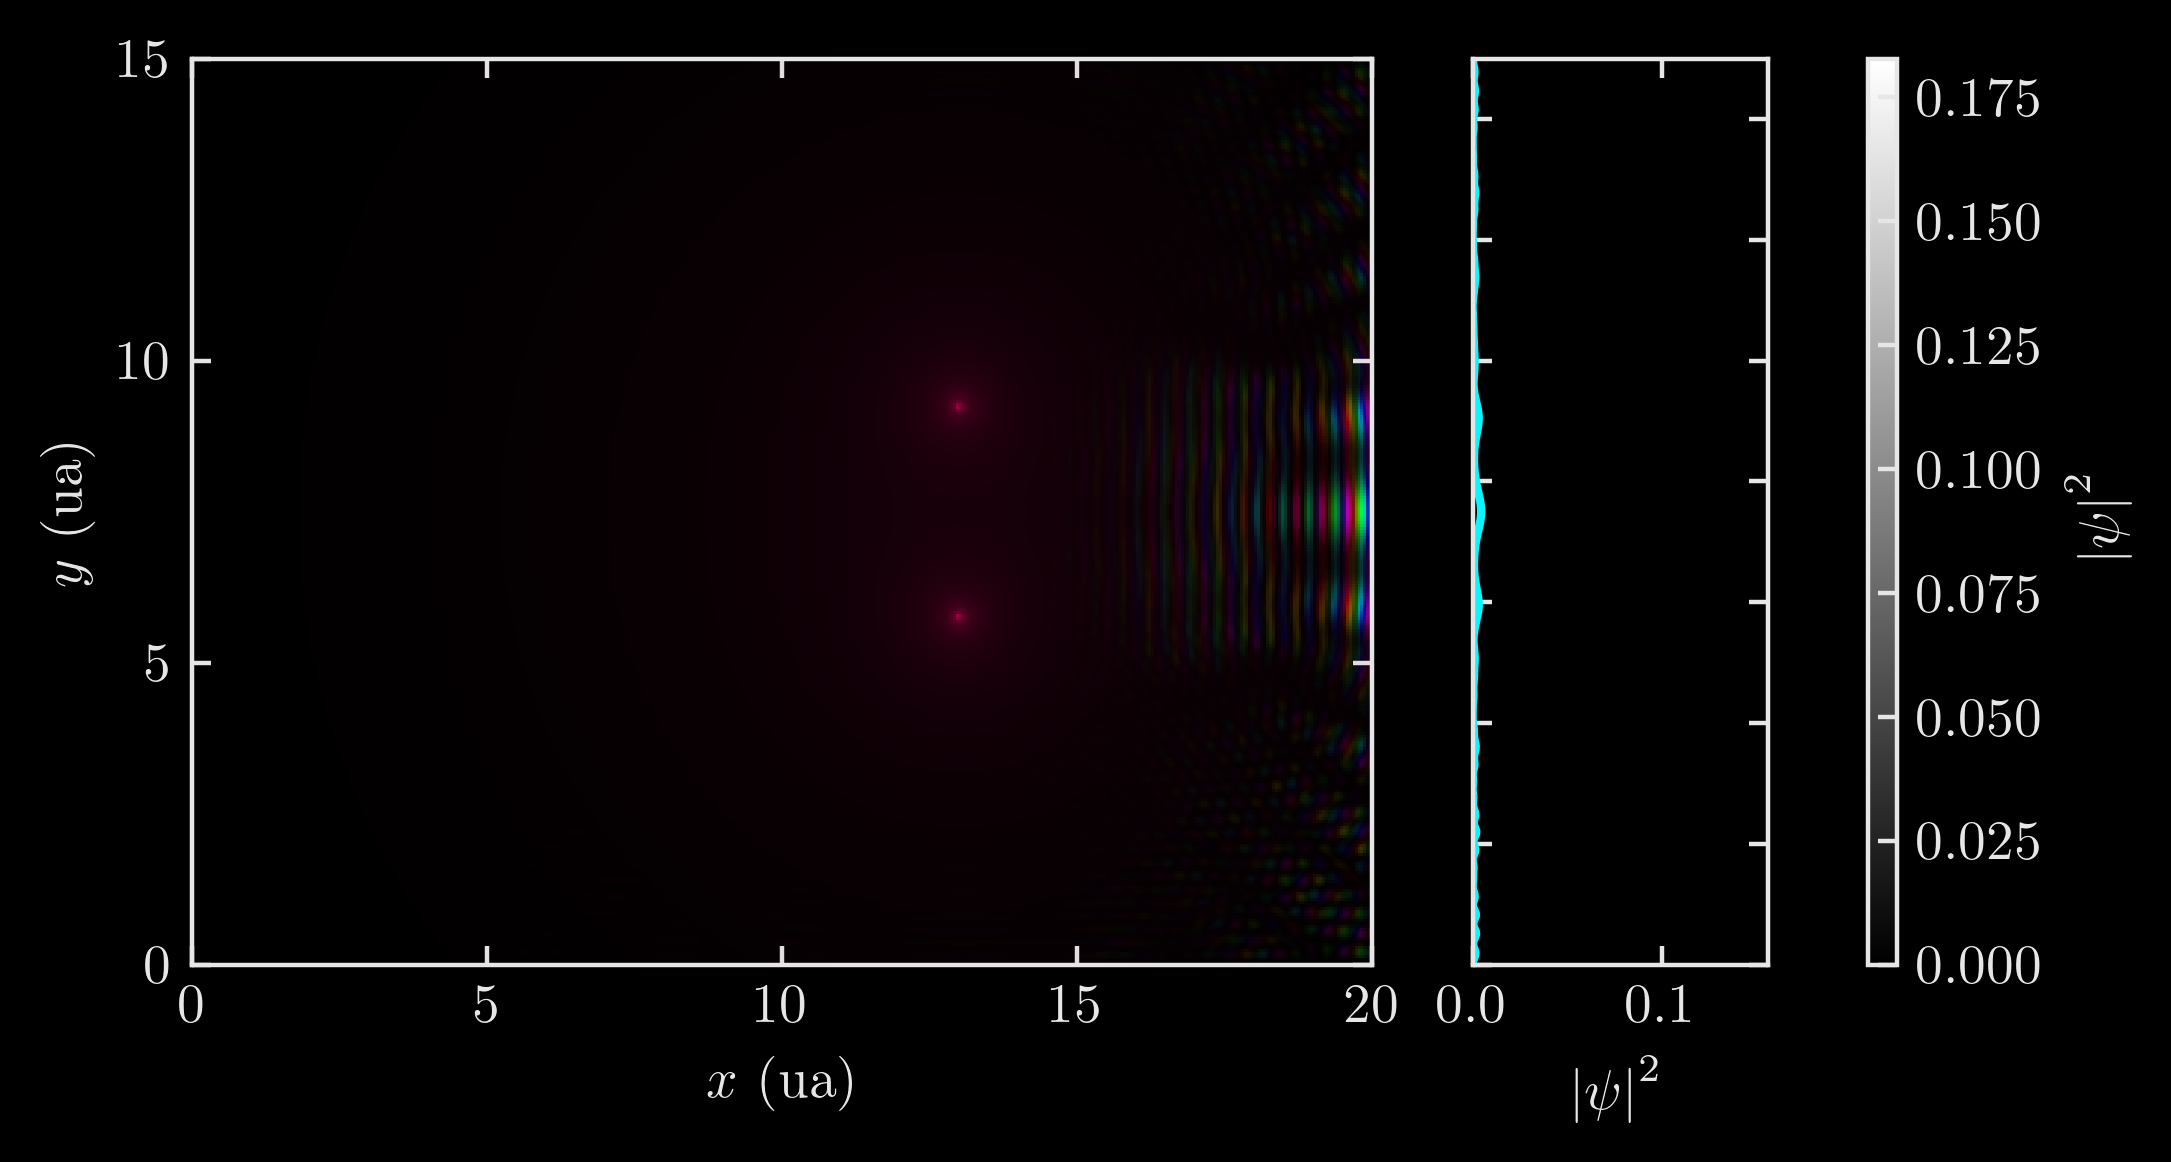

In [11]:
ap.graph_style()
fig, (ax_main, ax_right, ax_cb) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [4, 1, 0.1]}, figsize=(5.5, 3), dpi=400)

# PARTICLE
ax_main.set_xlabel(r'$x \ (\mathrm{ua})$')
ax_main.set_ylabel(r'$y \ (\mathrm{ua})$')
ax_main.set_yticks([0, 5, 10, 15])
vmin,vmax = 0.0, np.max(psi_prob)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# COLORBAR
fig.colorbar(ax_main.pcolormesh(xxs2, yys2, psi_prob[0], norm=norm, zorder=0, cmap='gray'), ax_cb, label=r'${|\psi|}^2$')

# BLACK BACKGROUND
fond_black = ax_main.pcolormesh(xxs2, yys2, zzs1, cmap='gray', zorder=1)

# POTENTIAL PLOT
Vsplot = [np.abs(V)**(0.4) for V in Vs]
#Vs_alpha = [1 - (V - np.min(Vs))/(np.max(Vs) - np.min(Vs)) for V in Vs]
Vs_alpha = [(V - np.min(Vsplot))/(np.max(Vsplot) - np.min(Vsplot)) for V in Vsplot]
fond_potential = ax_main.pcolormesh(xxs2, yys2, zzs1, zorder=2, cmap='Spectral', alpha=Vs_alpha)

# PARTICLE
psi_prob_alpha = np.zeros((M, ap.Ny, ap.Nx))
for i in range(M):
    psi_prob_alpha[i] = [(prob - np.min(psi_prob[i]))/(np.max(psi_prob[i]) - np.min(psi_prob[i])) for prob in psi_prob[i]]
#psi_prob_alpha = [(prob - np.min(psi_prob))/(np.max(psi_prob) - np.min(psi_prob)) for prob in psi_prob]
fond = ax_main.pcolormesh(xxs2, yys2, psi_deg[0], cmap='hsv', alpha=psi_prob_alpha[0])

# DIFFRACTION
ax_right.set_xlabel(r'${|\psi|}^2$')
ax_right.set_xlim((0, np.max(probs_end)*1.2))
ax_right.get_shared_y_axes().join(ax_main, ax_right)
ax_right.set_yticklabels([])
lin, = ax_right.plot([], [])
ys = np.linspace(0, ap.Ly, ap.Ny)

def animate(i):
    fond_black = ax_main.pcolormesh(xxs2, yys2, zzs1, cmap='gray')
    fond = ax_main.pcolormesh(xxs2, yys2, psi_deg[i], cmap='hsv', alpha=psi_prob_alpha[i])
    #fig.colorbar(ax_main.pcolormesh(xxs2, yys2, psi_prob[4*i], norm=norm, zorder=0, cmap='gray'), ax_cb, label=r'${|\psi|}^2$')
    lin.set_data(probs_end[i], ys)
    return fond

writervideo = animation.FFMpegWriter(fps=20) 
ani = animation.FuncAnimation(fig, animate, frames=M)
ani.save('Animacions/prob-with-diffraction.mp4',writer=writervideo)
plt.close()

### Electron with two atoms - detector without diffraction

In [12]:
xxs1, yys1, xxs2, yys2 = ap.get_positions('diffraction-no-diffraction/positions.txt')
Vs = ap.get_V('diffraction-no-diffraction/potential-d8-00.txt')
psi_re0, psi_im0, psi_norm0 = ap.get_psi('diffraction-no-diffraction/initial-state.txt')
psi_re, psi_im, psi_norm, psi_deg, M = ap.get_results('diffraction-no-diffraction/results-d8-00.txt')
zzs1 = np.zeros((ap.Ny, ap.Nx))
psi_prob = [norm**2 for norm in psi_norm]

Nombre d'iteracions: 125


In [13]:
norms_end = np.zeros((M, ap.Ny))
probs_end = np.zeros((M, ap.Ny))
for k in range(M):
    for j in range(ap.Ny):
        norms_end[k][j] = psi_norm[k][j][ap.Nx-10]
        probs_end[k][j] = psi_norm[k][j][ap.Nx-10]**2

In [ ]:
ys = np.linspace(0, ap.Ly, ap.Ny)

plt.figure(figsize=(4*1.618, 4), dpi=100)
plt.plot(ys, probs_end[110], lw=1.5)

plt.xlabel(r'$y \ (\mathrm{u.a.})$')
plt.ylabel(r'${|\psi|}^2$')
plt.xticks([0, 2.5, 5, 7.5, 10, 12.5, 15])

#plt.savefig('Imatges/detector-without-diffraction.pdf', bbox_inches='tight')
plt.close()

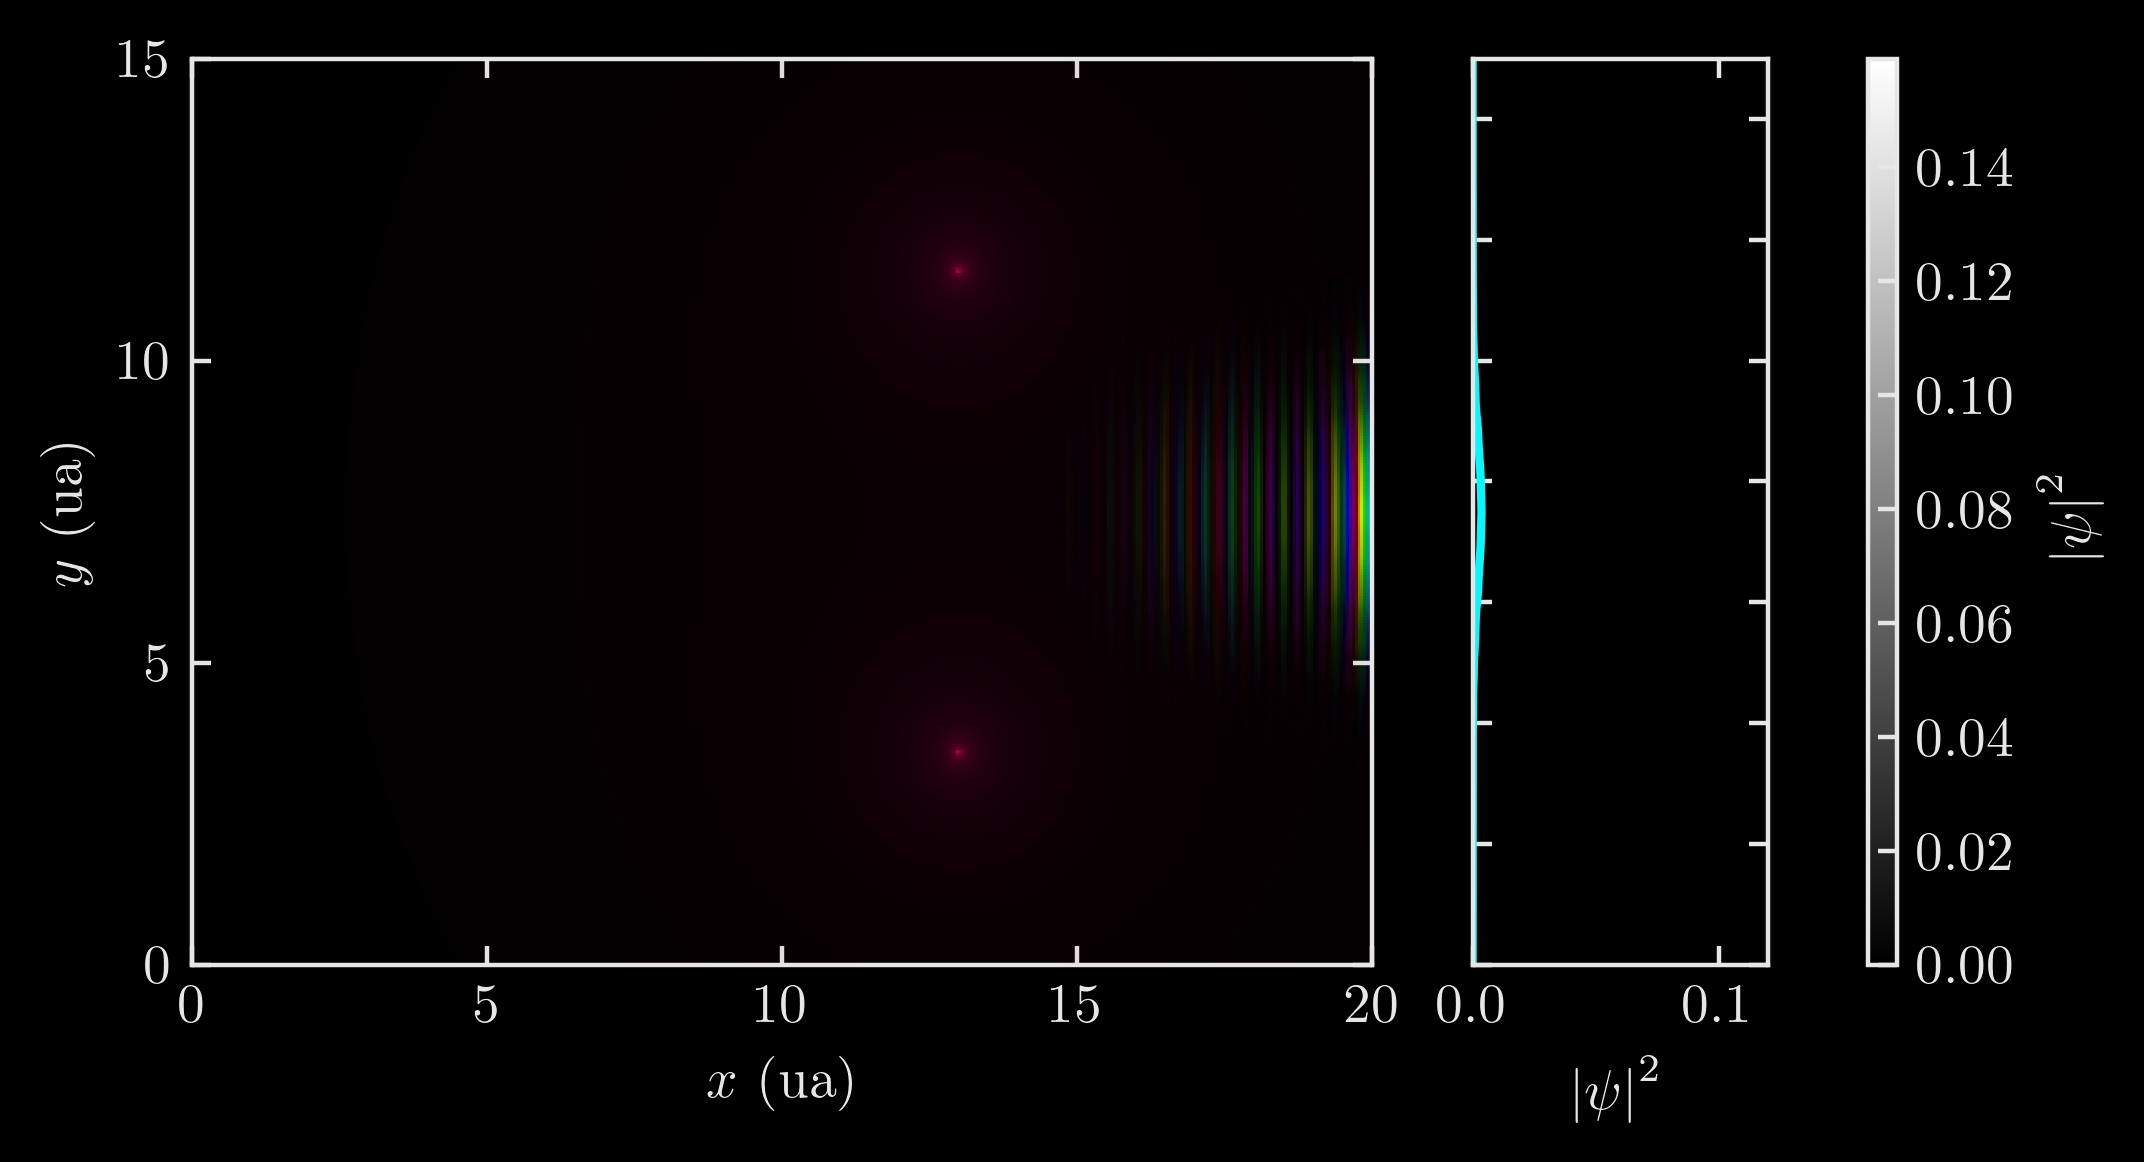

In [14]:
ap.graph_style()
fig, (ax_main, ax_right, ax_cb) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [4, 1, 0.1]}, figsize=(5.5, 3), dpi=400)

# PARTICLE
ax_main.set_xlabel(r'$x \ (\mathrm{ua})$')
ax_main.set_ylabel(r'$y \ (\mathrm{ua})$')
ax_main.set_yticks([0, 5, 10, 15])
vmin,vmax = 0.0, np.max(psi_prob)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# COLORBAR
fig.colorbar(ax_main.pcolormesh(xxs2, yys2, psi_prob[0], norm=norm, zorder=0, cmap='gray'), ax_cb, label=r'${|\psi|}^2$')

# BLACK BACKGROUND
fond_black = ax_main.pcolormesh(xxs2, yys2, zzs1, cmap='gray', zorder=1)

# POTENTIAL PLOT
Vsplot = [np.abs(V)**(0.4) for V in Vs]
#Vs_alpha = [1 - (V - np.min(Vs))/(np.max(Vs) - np.min(Vs)) for V in Vs]
Vs_alpha = [(V - np.min(Vsplot))/(np.max(Vsplot) - np.min(Vsplot)) for V in Vsplot]
fond_potential = ax_main.pcolormesh(xxs2, yys2, zzs1, zorder=2, cmap='Spectral', alpha=Vs_alpha)

# PARTICLE
psi_prob_alpha = np.zeros((M, ap.Ny, ap.Nx))
for i in range(M):
    psi_prob_alpha[i] = [(prob - np.min(psi_prob[i]))/(np.max(psi_prob[i]) - np.min(psi_prob[i])) for prob in psi_prob[i]]
#psi_prob_alpha = [(prob - np.min(psi_prob))/(np.max(psi_prob) - np.min(psi_prob)) for prob in psi_prob]
fond = ax_main.pcolormesh(xxs2, yys2, psi_deg[0], cmap='hsv', alpha=psi_prob_alpha[0])

# DIFFRACTION
ax_right.set_xlabel(r'${|\psi|}^2$')
ax_right.set_xlim((0, np.max(probs_end)*1.2))
ax_right.get_shared_y_axes().join(ax_main, ax_right)
ax_right.set_yticklabels([])
lin, = ax_right.plot([], [])
ys = np.linspace(0, ap.Ly, ap.Ny)

def animate(i):
    fond_black = ax_main.pcolormesh(xxs2, yys2, zzs1, cmap='gray')
    fond = ax_main.pcolormesh(xxs2, yys2, psi_deg[i], cmap='hsv', alpha=psi_prob_alpha[i])
    #fig.colorbar(ax_main.pcolormesh(xxs2, yys2, psi_prob[4*i], norm=norm, zorder=0, cmap='gray'), ax_cb, label=r'${|\psi|}^2$')
    lin.set_data(probs_end[i], ys)
    return fond

writervideo = animation.FFMpegWriter(fps=20) 
ani = animation.FuncAnimation(fig, animate, frames=M)
ani.save('Animacions/prob-without-diffraction.mp4',writer=writervideo)
plt.close()

### Electron in graphene

In [2]:
xxs1, yys1, xxs2, yys2 = ap.get_positions('Dades/graphene/positions.txt')
Vs = ap.get_V('Dades/graphene/potential.txt')
psi_re0, psi_im0, psi_norm0 = ap.get_psi('Dades/graphene/initial-state.txt')
psi_re, psi_im, psi_norm, psi_deg, M = ap.get_results('Dades/graphene/results-ABC.txt')
zzs1 = np.zeros((ap.Ny, ap.Nx))
psi_prob = [norm**2 for norm in psi_norm]

Nombre d'iteracions: 125


In [3]:
norms_end = np.zeros((M, ap.Ny))
probs_end = np.zeros((M, ap.Ny))
for k in range(M):
    for j in range(ap.Ny):
        norms_end[k][j] = psi_norm[k][j][ap.Nx-10]
        probs_end[k][j] = psi_norm[k][j][ap.Nx-10]**2

In [5]:
ap.graph_style()
fig, (ax_main, ax_right, ax_cb) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [4, 1, 0.1]}, figsize=(5.5, 3), dpi=500)

# PARTICLE
ax_main.set_xlabel(r'$x \ (\mathrm{ua})$')
ax_main.set_ylabel(r'$y \ (\mathrm{ua})$')
ax_main.set_yticks([0, 5, 10, 15])
vmin,vmax = 0.0, np.max(psi_prob)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# COLORBAR
fig.colorbar(ax_main.pcolormesh(xxs2, yys2, psi_prob[0], norm=norm, zorder=0, cmap='gray'), ax_cb, label=r'${|\psi|}^2$')

# BLACK BACKGROUND
fond_black = ax_main.pcolormesh(xxs2, yys2, zzs1, cmap='gray', zorder=1)

# POTENTIAL PLOT
Vsplot = [np.abs(V)**(0.4) for V in Vs]
#Vs_alpha = [1 - (V - np.min(Vs))/(np.max(Vs) - np.min(Vs)) for V in Vs]
Vs_alpha = [(V - np.min(Vsplot))/(np.max(Vsplot) - np.min(Vsplot)) for V in Vsplot]
fond_potential = ax_main.pcolormesh(xxs2, yys2, zzs1, zorder=2, cmap='Spectral', alpha=Vs_alpha)

# PARTICLE
psi_prob_alpha = np.zeros((M, ap.Ny, ap.Nx))
for i in range(M):
    psi_prob_alpha[i] = [(prob - np.min(psi_prob[i]))/(np.max(psi_prob[i]) - np.min(psi_prob[i])) for prob in psi_prob[i]]
#psi_prob_alpha = [(prob - np.min(psi_prob))/(np.max(psi_prob) - np.min(psi_prob)) for prob in psi_prob]
fond = ax_main.pcolormesh(xxs2, yys2, psi_deg[0], cmap='hsv', alpha=psi_prob_alpha[0])

# DIFFRACTION
ax_right.set_xlabel(r'${|\psi|}^2$')
ax_right.set_xlim((0, np.max(probs_end)*1.2))
ax_right.get_shared_y_axes().join(ax_main, ax_right)
ax_right.set_yticklabels([])
lin, = ax_right.plot([], [])
ys = np.linspace(0, ap.Ly, ap.Ny)

def animate(i):
    fond_black = ax_main.pcolormesh(xxs2, yys2, zzs1, cmap='gray')
    fond = ax_main.pcolormesh(xxs2, yys2, psi_deg[i], cmap='hsv', alpha=psi_prob_alpha[i])
    #fig.colorbar(ax_main.pcolormesh(xxs2, yys2, psi_prob[4*i], norm=norm, zorder=0, cmap='gray'), ax_cb, label=r'${|\psi|}^2$')
    lin.set_data(probs_end[i], ys)
    return fond

writervideo = animation.FFMpegWriter(fps=20) 
ani = animation.FuncAnimation(fig, animate, frames=M)
ani.save('Animacions/graphene.mp4',writer=writervideo)
plt.close()